<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [12]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [17]:
# Create a Ticker object
tesla_ticker = yf.Ticker("TSLA")
tesla_ticker

yfinance.Ticker object <TSLA>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [16]:
tesla_data = tesla_ticker.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2023-12-18,253.779999,258.739990,251.360001,252.080002,116416500,0,0.0
2023-12-19,253.479996,258.339996,253.009995,257.220001,106737400,0,0.0
2023-12-20,256.410004,259.839996,247.000000,247.139999,125097000,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [15]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [20]:
html_data="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

Parse the html data using `beautiful_soup`.


In [33]:
# Make a GET request to the URL
response = requests.get(html_data)
response


<Response [200]>

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [34]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table with Tesla Revenue
    table = soup.find('table')

    # Extract the table and create a DataFrame
    tesla_revenue = pd.read_html(str(table))[0]

    # Rename columns to Date and Revenue
    tesla_revenue.columns = ['Date', 'Revenue']

    print(tesla_revenue.head())
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [35]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [36]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [41]:
Gamestop_ticker=yf.Ticker("GME")
Gamestop_ticker

yfinance.Ticker object <GME>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [42]:
Gamestop_data = Gamestop_ticker.history(period="max")
Gamestop_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-18,17.240000,18.510000,17.100000,17.860001,7352200,0.0,0.0
2023-12-19,17.889999,18.590000,17.230000,17.719999,5447100,0.0,0.0
2023-12-20,17.530001,18.379999,16.889999,16.930000,5553000,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [43]:
Gamestop_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(Gamestop_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [46]:
# URL of the webpage
html_data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"



Parse the html data using `beautiful_soup`.


In [69]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content
# If not, use the code from the previous question to download the webpage and get html_data

# Parse the HTML data using BeautifulSoup with the 'lxml' parser
soup = BeautifulSoup(html_data, 'lxml')

# Now you can work with the parsed HTML content using the 'soup' object
# For example, print the title tag content
title_tag = soup.title
if title_tag is not None:
    title_content = title_tag.string
    print(f"Content of the 'title' tag: {title_content}")
else:
    print("No title tag found in the HTML.")

Content of the 'title' tag: GameStop Revenue 2006-2020 | GME | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [ ]:
!pip install html5lib
from bs4 import BeautifulSoup
import pandas as pd

# Assuming soup contains the parsed HTML data
# If not, use the code from the previous question to parse the HTML data and get soup

# Isolate the table using soup.find_all("tbody")[1]
table = soup.find_all("tbody")[1]

# Use read_html to extract the table directly into a DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Print the columns to identify the actual column names
print("Columns:", gme_revenue.columns)

# Clean the 'Revenue' column if the actual column name is different
# Replace '[\$,]' with '' to remove commas and dollar signs
# Convert the column to float
gme_revenue['ActualColumnName'] = gme_revenue['ActualColumnName'].replace('[\$,]', '', regex=True).astype(float




Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [75]:
# Display the DataFrame
print(gme_revenue.head())

   2020-04-30  $1,021
0  2020-01-31  $2,194
1  2019-10-31  $1,439
2  2019-07-31  $1,286
3  2019-04-30  $1,548
4  2019-01-31  $3,063


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


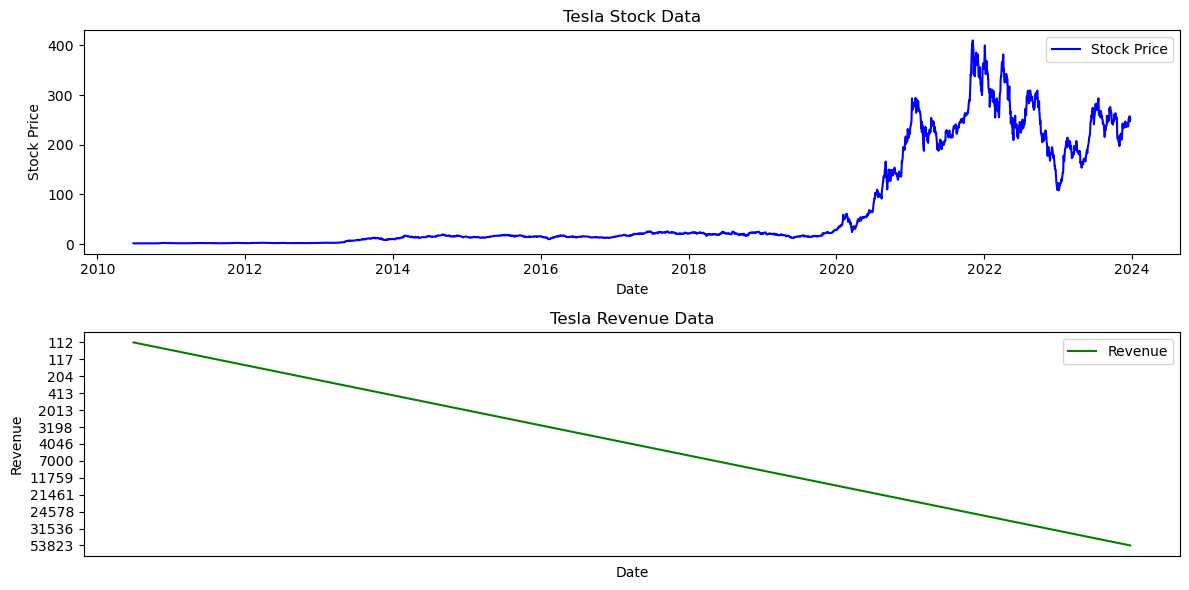

In [76]:
!pip install matplotlib pandas
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    """
    Graphs stock data and revenue data for a given company.

    Parameters:
    - stock_data: DataFrame containing stock data
    - revenue_data: DataFrame containing revenue data
    - company_name: Name of the company for the graph title
    """
    # Extract relevant data for plotting
    stock_dates = stock_data.index
    stock_prices = stock_data['Close']
    revenue_dates = pd.to_datetime(revenue_data['Date'])
    revenue_values = revenue_data['Revenue']

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot stock data
    plt.subplot(2, 1, 1)
    plt.plot(stock_dates, stock_prices, label='Stock Price', color='blue')
    plt.title(f'{company_name} Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot revenue data
    plt.subplot(2, 1, 2)
    plt.plot(revenue_dates, revenue_values, label='Revenue', color='green')
    plt.title(f'{company_name} Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Assuming you have tesla_data and tesla_revenue available
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbol for GameStop
gme_ticker_symbol = "GME"

# Fetch historical stock information with 'period' set to 'max'
gme_data = yf.Ticker(gme_ticker_symbol).history(period="max")

# Assuming you have gme_revenue available (you extracted it using BeautifulSoup or read_html)

# Define the make_graph function
def make_graph(stock_data, revenue_data, company_name):
    """
    Graphs stock data and revenue data for a given company.

    Parameters:
    - stock_data: DataFrame containing stock data
    - revenue_data: DataFrame containing revenue data
    - company_name: Name of the company for the graph title
    """
    # Extract relevant data for plotting
    stock_dates = stock_data.index
    stock_prices = stock_data['Close']
    revenue_dates = pd.to_datetime(revenue_data['Date'])
    revenue_values = revenue_data['Revenue']

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot stock data
    plt.subplot(2, 1, 1)
    plt.plot(stock_dates, stock_prices, label='Stock Price', color='blue')
    plt.title(f'{company_name} Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    # Plot revenue data
    plt.subplot(2, 1, 2)
    plt.plot(revenue_dates, revenue_values, label='Revenue', color='green')
    plt.title(f'{company_name} Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the make_graph function with the appropriate variables
make_graph(gme_data, gme_revenue, 'GameStop')



<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
